In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar
from wordcloud import WordCloud

from dataprep.clean import clean_text

sns.set(style='darkgrid')
plt.rcParams["figure.figsize"] = (12,6)

NumExpr defaulting to 4 threads.


In [28]:
df = pd.read_csv('app_store_reviews.csv')
df

,date,userName,title,rating,isEdited,review,crawled_at,url,app_id,country,app_name,_id,developerResponse
0,2017-09-08 11:58:17,Mika 👽,Dieser nervige Button 😂,5,False,"Sehr gute App, erfüllt Ihren Zweck. Finde so g...",2021-02-21 10:15:43,https://apps.apple.com/at/app/whatsapp-messeng...,310633997,at,whatsapp-messenger,32f9ec7e-74de-578d-acf6-48d4182cae60,NaN
1,2017-09-06 15:32:26,Bilux1,Super App,5,False,Bester Messenger Dienst,2021-02-21 10:15:43,https://apps.apple.com/at/app/whatsapp-messeng...,310633997,at,whatsapp-messenger,f89a85f6-437e-53f4-acd0-adda3ae5ab2e,NaN
2,2021-01-08 22:31:30,Leberkasbepi,Tschüss,1,False,"Wegen den neuen Richtlinien, werd ich WhatsApp...",2021-02-21 10:15:43,https://apps.apple.com/at/app/whatsapp-messeng...,310633997,at,whatsapp-messenger,65adfbd9-dbab-5ba8-8d40-d84dc7e8f515,NaN
3,2019-01-15 12:18:55,1an--na1,Gehört jzt zu facebook,1,False,Furchtbare datenschutzpolitik,2021-02-21 10:15:43,https://apps.apple.com/at/app/whatsapp-messeng...,310633997,at,whatsapp-messenger,da48ad1c-3977-5e9d-8d74-c84f62ec1830,NaN
4,2020-05-24 13:51:44,Bykslmddislnsvsj,.,4,False,Wäre org wenn’s eine Abstimmungs-Funktion für ...,2021-02-21 10:15:43,https://apps.apple.com/at/app/whatsapp-messeng...,310633997,at,whatsapp-messenger,eefd7e92-a6d2-55de-b14b-b00002fa8380,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10583,2011-06-22 11:57:44,Pamzwamz23,Wowza,5,False,This is a pretty gd game my sister told me to ...,2021-02-20 23:53:35,https://apps.apple.com/au/app/talking-tom-cat-...,421997825,au,talking-tom-cat-2,a278daaa-1ec3-529c-a77e-405bb17ffba9,NaN
10584,2011-06-20 21:17:51,I love you so much.,tom the talking cat 2,5,False,I loved it how its soooo funny and it is much ...,2021-02-20 23:53:35,https://apps.apple.com/au/app/talking-tom-cat-...,421997825,au,talking-tom-cat-2,7588b673-8630-5918-a053-069154a603dc,NaN
10585,2011-06-01 07:09:11,Asantha,Excellent app,5,False,Try this for your self.great for greetings!!!,2021-02-20 23:53:35,https://apps.apple.com/au/app/talking-tom-cat-...,421997825,au,talking-tom-cat-2,73874b2c-c079-5782-b4ba-df59c1becf0a,NaN
10586,2011-05-30 21:46:39,Frank Pittari,Worst game ever!,5,False,It suck u have to buy all these add-ons.,2021-02-20 23:53:35,https://apps.apple.com/au/app/talking-tom-cat-...,421997825,au,talking-tom-cat-2,d7a16ad6-a4ab-5fdc-b959-d2442673600a,NaN


In [29]:
df.head()

,date,userName,title,rating,isEdited,review,crawled_at,url,app_id,country,app_name,_id,developerResponse
0,2017-09-08 11:58:17,Mika 👽,Dieser nervige Button 😂,5,False,"Sehr gute App, erfüllt Ihren Zweck. Finde so g...",2021-02-21 10:15:43,https://apps.apple.com/at/app/whatsapp-messeng...,310633997,at,whatsapp-messenger,32f9ec7e-74de-578d-acf6-48d4182cae60,NaN
1,2017-09-06 15:32:26,Bilux1,Super App,5,False,Bester Messenger Dienst,2021-02-21 10:15:43,https://apps.apple.com/at/app/whatsapp-messeng...,310633997,at,whatsapp-messenger,f89a85f6-437e-53f4-acd0-adda3ae5ab2e,NaN
2,2021-01-08 22:31:30,Leberkasbepi,Tschüss,1,False,"Wegen den neuen Richtlinien, werd ich WhatsApp...",2021-02-21 10:15:43,https://apps.apple.com/at/app/whatsapp-messeng...,310633997,at,whatsapp-messenger,65adfbd9-dbab-5ba8-8d40-d84dc7e8f515,NaN
3,2019-01-15 12:18:55,1an--na1,Gehört jzt zu facebook,1,False,Furchtbare datenschutzpolitik,2021-02-21 10:15:43,https://apps.apple.com/at/app/whatsapp-messeng...,310633997,at,whatsapp-messenger,da48ad1c-3977-5e9d-8d74-c84f62ec1830,NaN
4,2020-05-24 13:51:44,Bykslmddislnsvsj,.,4,False,Wäre org wenn’s eine Abstimmungs-Funktion für ...,2021-02-21 10:15:43,https://apps.apple.com/at/app/whatsapp-messeng...,310633997,at,whatsapp-messenger,eefd7e92-a6d2-55de-b14b-b00002fa8380,NaN


In [30]:
df.shape

(10588, 13)

In [31]:
df.dtypes

date                 object
userName             object
title                object
rating                int64
isEdited               bool
review               object
crawled_at           object
url                  object
app_id                int64
country              object
app_name             object
_id                  object
developerResponse    object
dtype: object

In [32]:
df.isna().sum()

date                     0
userName                 0
title                    0
rating                   0
isEdited                 0
review                   0
crawled_at               0
url                      0
app_id                   0
country                  0
app_name                 0
_id                      0
developerResponse    10537
dtype: int64

In [34]:
df1 = df.copy()

In [35]:
df1['date'] = pd.to_datetime(df['date'])

#creare a new column month and year to do a better analysis
df1['month'] = df1['date'].dt.month.apply(lambda x: calendar.month_abbr[x])
df1['year'] = df1['date'].dt.year


  

In [36]:
df1.sample(2)

,date,userName,title,rating,isEdited,review,crawled_at,url,app_id,country,app_name,_id,developerResponse,month,year
1608,2017-03-05 17:32:24,Lolpel,Status ist wertlos,1,False,Bitte den alten Status zurückbringen!,2021-02-21 10:15:43,https://apps.apple.com/at/app/whatsapp-messeng...,310633997,at,whatsapp-messenger,e72c6049-4cee-51ae-b900-e03bd8e4ce6d,NaN,Mar,2017
10529,2011-11-30 23:06:19,GameLover4everAndever,Nejgxv,5,False,Vbgbgf,2021-02-20 23:53:35,https://apps.apple.com/au/app/talking-tom-cat-...,421997825,au,talking-tom-cat-2,cc88fcdc-7365-5847-a04c-8131c13df6dc,NaN,Nov,2011


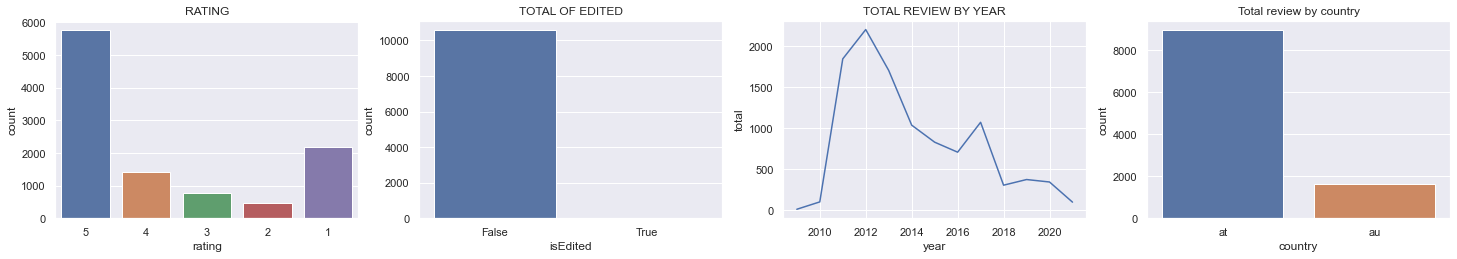

In [37]:
plt.figure(figsize=(25,8));
plt.subplot( 2, 4, 1 );
sns.countplot(x='rating', order=[5,4,3,2,1], data=df1);
plt.title('RATING');

plt.subplot( 2, 4, 2 );
sns.countplot(x='isEdited', data=df1);
plt.title('TOTAL OF EDITED');

plt.subplot( 2, 4, 3 );
df_year = df1.groupby('year', as_index=False)['isEdited'].count().rename(columns={'isEdited':'total'})
sns.lineplot(x='year', y='total', data = df_year);
plt.title('TOTAL REVIEW BY YEAR');

plt.subplot( 2, 4, 4 );
sns.countplot(x='country', data=df1);
plt.title('Total review by country');

In [38]:
def count_rating(rating, data, x, y, n):
    data = data[ data['rating'] == rating ]
    count = data.groupby(x, as_index=False)['isEdited'].count().rename( columns = {'isEdited':'total'})
    count['%'] = round((count['total'] / count['total'].sum()) * 100, 2)
  
    chart = sns.barplot(x=x, y =y, data = count.nlargest(n, 'total'), palette='Blues_r')
    
    plt.title(f'Rating {rating} by {x.replace("_", " ")}', fontweight="bold")
    chart.spines['top'].set_visible(False)
    chart.spines['right'].set_visible(False)
    plt.subplots_adjust(left=0.1, 
                    bottom=0.3,  
                    right=0.9,  
                    top=2.8,  
                    wspace=0.4,  
                    hspace=1)
    return chart

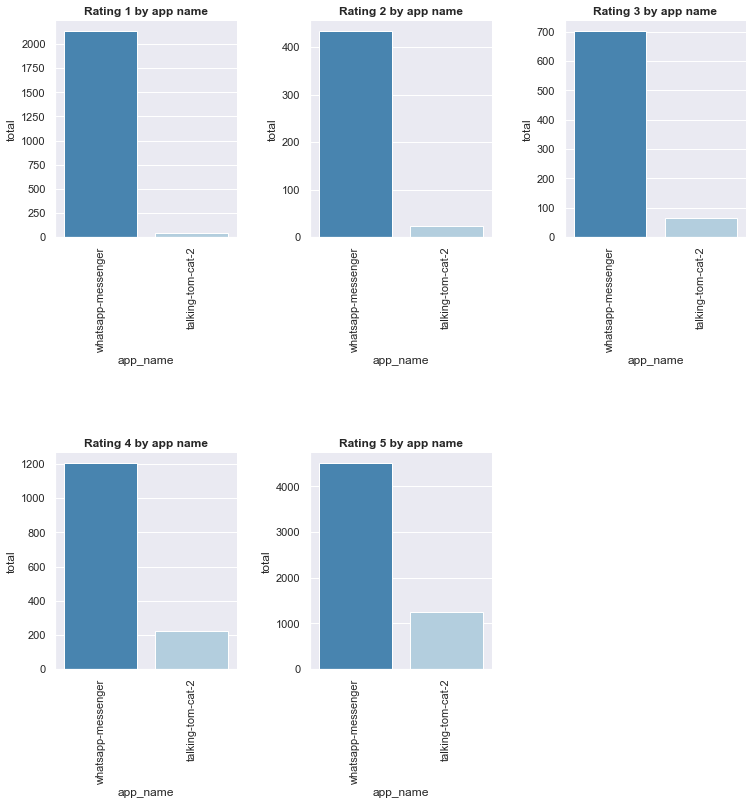

In [39]:
for i in range(1,6):
    plt.subplot( 3, 3, i );
    count_rating(i, df1, 'app_name', 'total', 10);
    plt.xticks(rotation=90);

In [41]:
var = [' '" ".join(word for word in df1['title'].astype(str))]
var=var[0]

var_1 = [' '" ".join(word for word in df1['review'].astype(str))]
var_1=var_1[0]

In [42]:
wordcloud=WordCloud(width = 2000, height = 1000, 
                background_color ='White', colormap = 'Set2',min_font_size = 20).generate(var)
wordcloud1=WordCloud(width = 2000, height = 1000, 
                background_color ='White', colormap = 'Set3',min_font_size = 20).generate(var_1)

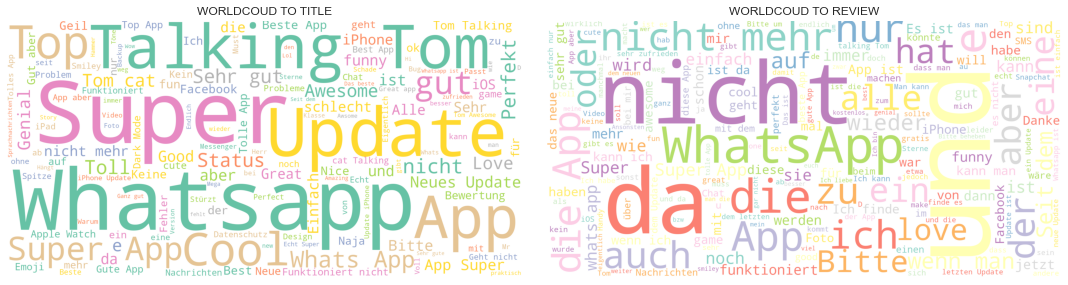

In [43]:
plt.figure(figsize = (15, 8), facecolor = None)

plt.subplot( 2, 2, 1 );
plt.imshow(wordcloud)
plt.title('WORLDCOUD TO TITLE')
plt.axis("off")

plt.subplot( 2, 2, 2 );
plt.imshow(wordcloud1)
plt.title('WORLDCOUD TO REVIEW')
plt.axis("off")

plt.tight_layout(pad = 0)
plt.subplots_adjust(hspace=0.2)
  
plt.show()